In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
device = torch.device("cuda")

import os
os.environ['CHEAP_CACHE'] = "/shared/amyxlu/cheap/test_hf"

In [4]:
from cheap.pretrained import CHEAP_shorten_1_dim_16
pipeline = CHEAP_shorten_1_dim_16(return_pipeline=True)

Using checkpoint at /shared/amyxlu/cheap/test_hf/checkpoints/yfel5fnl.


Downloading: "https://huggingface.co/amyxlu/cheap-proteins/resolve/main/checkpoints/yfel5fnl/last.ckpt" to /shared/amyxlu/cheap/test_hf/checkpoints/yfel5fnl/last.ckpt
100%|███████████████████████████████████████████████| 1.07G/1.07G [00:30<00:00, 38.0MB/s]


Using tanh layer at bottleneck...
Finished loading HPCT model with shorten factor 1 and 16 channel dimensions.
Creating ESMFold embedding only model...
ESMFold embedding only model created in 28.26 seconds


In [5]:
sequences = [
    # >cath|current|12asA00/4-330
    "AYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQDNLSGAEKAVQVKVKALPDAQFEVVHSLAKWKRQTLGQHDFSAGEGLYTHMKALRPDEDRLSPLHSVYVDQWDWERVMGDGERQFSTLKSTVEAIWAGIKATEAAVSEEFGLAPFLPDQIHFVHSQELLSRYPDLDAKGRERAIAKDLGAVFLVGIGGKLSDGHRHDVRAPDYDDWSTPSELGHAGLNGDILVWNPVLEDAFELSSMGIRVDADTLKHQLALTGDEDRLELEWHQALLRGEMPQTIGGGIGQSRLTMLLLQLPHIGQVQAGVWPAAVRESVPSLL",
    # >cath|current|132lA00/2-129
    "VFGRCELAAAMRHGLDNYRGYSLGNWVCAAFESNFNTQATNRNTDGSTDYGILQINSRWWCNDGRTPGSRNLCNIPCSALLSSDITASVNCAKIVSDGNGMNAWVAWRNRCGTDVQAWIRGCRL",
    # >cath|current|153lA00/1-185
    "RTDCYGNVNRIDTTGASCKTAKPEGLSYCGVSASKKIAERDLQAMDRYKTIIKKVGEKLCVEPAVIAGIISRESHAGKVLKNGWGDRGNGFGLMQVDKRSHKPQGTWNGEVHITQGTTILINFIKTIQKKFPSWTKDQQLKGGISAYNAGAGNVRSYARMDIGTTHDDYANDVVARAQYYKQHGY",
]

emb, mask = pipeline(sequences)

In [6]:
# The sequences have been automatically padded to the longest sequence in the batch.
# If you are running out of memory, consider trimming the sequences prior to this embedding inference operation.

print(emb.shape)
print(mask.shape)

torch.Size([3, 327, 16])
torch.Size([3, 327])


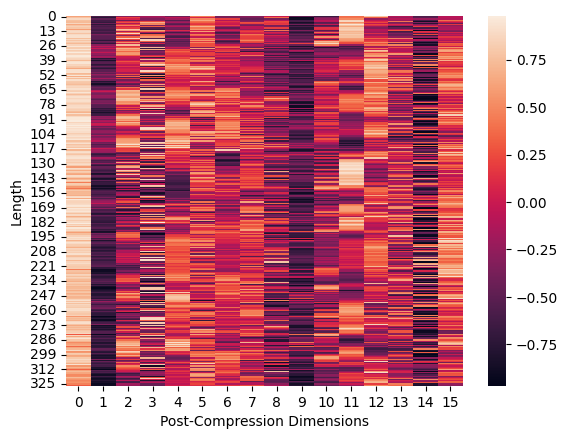

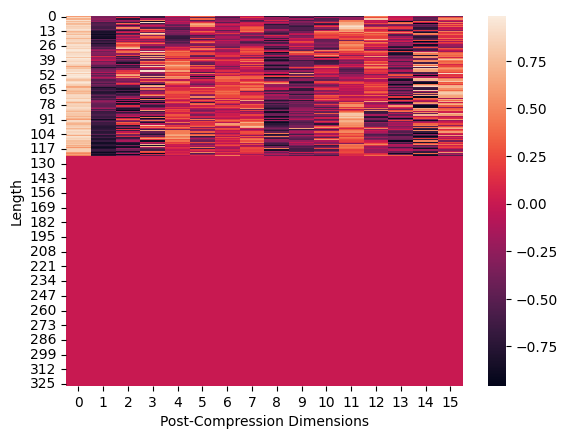

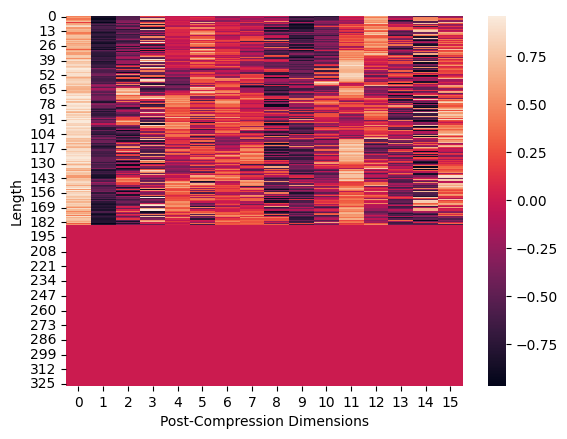

In [7]:
# Sanity inspect embeddings and masks
import seaborn as sns
import matplotlib.pyplot as plt
import einops

for i in range(len(emb)):
    sns.heatmap(
        emb[i].cpu().numpy() * einops.repeat(mask[i].cpu().numpy(), "l -> l c", c=emb.shape[-1])
    )
    plt.xlabel("Post-Compression Dimensions")
    plt.ylabel("Length")
    plt.show()